In [1]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv("tweets.csv")
df.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


Checking for count of null values

In [3]:
df.isnull().sum()

id                            0
handle                        0
text                          0
is_retweet                    0
original_author            5722
time                          0
in_reply_to_screen_name    6236
in_reply_to_status_id      6242
in_reply_to_user_id        6236
is_quote_status               0
lang                          0
retweet_count                 0
favorite_count                0
longitude                  6432
latitude                   6432
place_id                   6240
place_full_name            6240
place_name                 6240
place_type                 6240
place_country_code         6240
place_country              6240
place_contained_within     6240
place_attributes           6240
place_bounding_box         6240
source_url                    0
truncated                     0
entities                      0
extended_entities          5096
dtype: int64

Keeping only desired columns

In [4]:
myDf = df[["handle","text","truncated"]]

In [5]:
myDf.head()

,handle,text,truncated
0,HillaryClinton,The question in this election: Who can put the...,False
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",False
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,False
3,HillaryClinton,"If we stand together, there's nothing we can't...",False
4,HillaryClinton,Both candidates were asked about how they'd co...,False


Checking for count of null values:

In [6]:
myDf.isnull().sum()

handle       0
text         0
truncated    0
dtype: int64

Function for preprocessing:

In [7]:
def preprocessing(sent):
    sent = str(sent)
    sent = sent.lower()
    sent = sent.replace('{html}',"")
    clean = re.compile('<.*?>')
    cleant = re.sub(clean,"",sent)
    remUrl = re.sub(r'http\S+',"",cleant)
    remNum = re.sub('[0-9]+',"",remUrl)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(remNum)
    filteredWords = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stemWords = [stemmer.stem(w) for w in filteredWords]
    lemmaWords = [lemmatizer.lemmatize(w) for w in stemWords]
    return " ".join(filteredWords)


Applying function of "preprocessing" on "text" columns:

In [8]:
myDf['cleaned_text'] = myDf['text'].map(lambda x: preprocessing(x))
myDf.head(10)

<ipython-input-8-b1df75774bd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf['cleaned_text'] = myDf['text'].map(lambda x: preprocessing(x))


,handle,text,truncated,cleaned_text
0,HillaryClinton,The question in this election: Who can put the...,False,question election put plans action make life b...
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",False,last night donald trump said paying taxes smar...
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,False,proud hillaryclinton vision command last night...
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,stand together nothing make sure ready vote
4,HillaryClinton,Both candidates were asked about how they'd co...,False,candidates asked confront racial injustice one...
5,realDonaldTrump,Join me for a 3pm rally - tomorrow at the Mid-...,True,join rally tomorrow mid america center council...
6,HillaryClinton,This election is too important to sit out. Go ...,False,election important sit make sure registered na...
7,HillaryClinton,When Donald Trump goes low...register to vote:...,False,donald trump goes low register vote
8,realDonaldTrump,"Once again, we will have a government of, by a...",False,government people join movement today
9,HillaryClinton,3) Has Trump offered a single proposal to redu...,False,trump offered single proposal reduce friction ...


Preparing functions, "subjectivity" and "polarity" for calculating subjectivity and polarity for tweets

In [9]:
def subjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity
def polarity(txt):
    return TextBlob(txt).sentiment.polarity

Applying function "subjectivity" on column "cleaned_text":

In [10]:
myDf['subjectivity'] = myDf['cleaned_text'].apply(subjectivity)
myDf.head()

<ipython-input-10-2dbd3bc7ccb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf['subjectivity'] = myDf['cleaned_text'].apply(subjectivity)


,handle,text,truncated,cleaned_text,subjectivity
0,HillaryClinton,The question in this election: Who can put the...,False,question election put plans action make life b...,0.300000
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",False,last night donald trump said paying taxes smar...,0.354762
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,False,proud hillaryclinton vision command last night...,0.391667
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,stand together nothing make sure ready vote,0.694444
4,HillaryClinton,Both candidates were asked about how they'd co...,False,candidates asked confront racial injustice one...,0.300000


Applying function "polarity" on column "cleaned_text":

In [11]:
myDf['polarity'] = myDf['cleaned_text'].apply(polarity)
myDf.head()

<ipython-input-11-2c02f18255fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf['polarity'] = myDf['cleaned_text'].apply(polarity)


,handle,text,truncated,cleaned_text,subjectivity,polarity
0,HillaryClinton,The question in this election: Who can put the...,False,question election put plans action make life b...,0.300000,0.300000
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",False,last night donald trump said paying taxes smar...,0.354762,0.107143
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,False,proud hillaryclinton vision command last night...,0.391667,0.250000
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,stand together nothing make sure ready vote,0.694444,0.350000
4,HillaryClinton,Both candidates were asked about how they'd co...,False,candidates asked confront racial injustice one...,0.300000,0.200000


creating function "sent" for labeling tweets positive, negative or neutral:

In [12]:
def sent(val):
    if val > 0:
        return 'positive'
    elif val == 0:
        return 'neutral'
    else:
        return 'negative'

Applying function, "sent" on column "polarity" to label:

In [13]:
myDf['sentiment_analysis'] = myDf['polarity'].apply(sent)
myDf.head()

<ipython-input-13-d74b0af789c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf['sentiment_analysis'] = myDf['polarity'].apply(sent)


,handle,text,truncated,cleaned_text,subjectivity,polarity,sentiment_analysis
0,HillaryClinton,The question in this election: Who can put the...,False,question election put plans action make life b...,0.300000,0.300000,positive
1,HillaryClinton,"Last night, Donald Trump said not paying taxes...",False,last night donald trump said paying taxes smar...,0.354762,0.107143,positive
2,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,False,proud hillaryclinton vision command last night...,0.391667,0.250000,positive
3,HillaryClinton,"If we stand together, there's nothing we can't...",False,stand together nothing make sure ready vote,0.694444,0.350000,positive
4,HillaryClinton,Both candidates were asked about how they'd co...,False,candidates asked confront racial injustice one...,0.300000,0.200000,positive


In [14]:
myDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   handle              6444 non-null   object 
 1   text                6444 non-null   object 
 2   truncated           6444 non-null   bool   
 3   cleaned_text        6444 non-null   object 
 4   subjectivity        6444 non-null   float64
 5   polarity            6444 non-null   float64
 6   sentiment_analysis  6444 non-null   object 
dtypes: bool(1), float64(2), object(4)
memory usage: 308.5+ KB


In [15]:
#Positivity:
pos_sent = myDf[myDf['sentiment_analysis'] == 'positive']
print("Positivity of data is: ",round((pos_sent.shape[0]/myDf.shape[0])*100,1),"%")

Positivity of data is:  44.9 %


In [16]:
#Negativity:
neg_sent = myDf[myDf['sentiment_analysis'] == 'negative']
print("Negativity of data is: ",round((neg_sent.shape[0]/myDf.shape[0])*100,1),"%")

Negativity of data is:  17.6 %


In [17]:
#Neutrality:
neu_sent = myDf[myDf['sentiment_analysis'] == 'neutral']
print("Neutrality of data is: ",round((neg_sent.shape[0]/myDf.shape[0])*100,1),"%")

Neutrality of data is:  17.6 %


In [18]:
myDf['sentiment_analysis'].value_counts()

positive    2894
neutral     2417
negative    1133
Name: sentiment_analysis, dtype: int64

<AxesSubplot:>

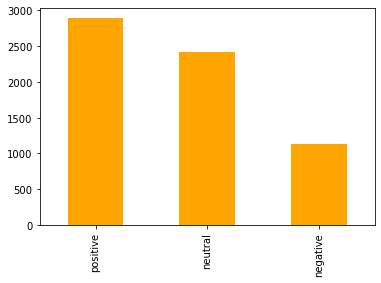

In [19]:
myDf['sentiment_analysis'].value_counts().plot(kind="bar", color="orange")

In [20]:
import seaborn as sns

<AxesSubplot:title={'center':'Count of tweets for Hillary Clinton and Donald Trump'}, xlabel='handle', ylabel='count'>

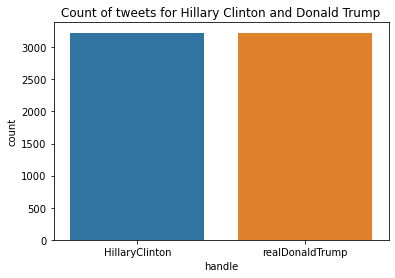

In [21]:
plt.title("Count of tweets for Hillary Clinton and Donald Trump")
sns.countplot(x='handle',data=myDf)

Text(0, 0.5, 'Count')

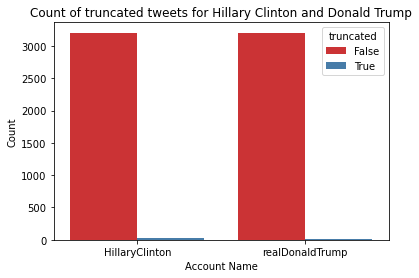

In [22]:
plt.title("Count of truncated tweets for Hillary Clinton and Donald Trump")
p = sns.countplot(x='handle', hue = 'truncated', data = myDf, palette = 'Set1')
p.set_xlabel("Account Name", fontsize = 10)
p.set_ylabel("Count", fontsize = 10)

Text(0, 0.5, 'Count')

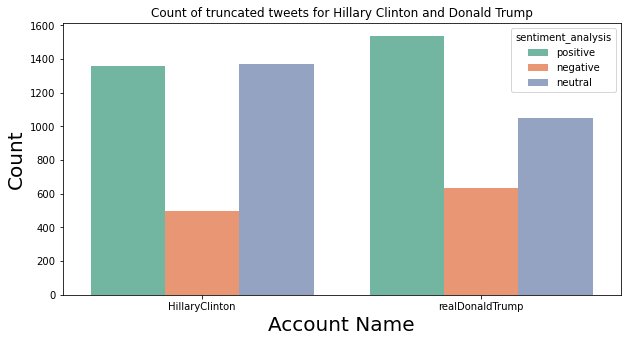

In [23]:
plt.figure(figsize=(10,5))
plt.title("Count of truncated tweets for Hillary Clinton and Donald Trump")
p = sns.countplot(x='handle', hue = 'sentiment_analysis', data = myDf, palette = 'Set2')
p.set_xlabel("Account Name", fontsize = 20)
p.set_ylabel("Count", fontsize = 20)

In [24]:
myDf.shape

(6444, 7)

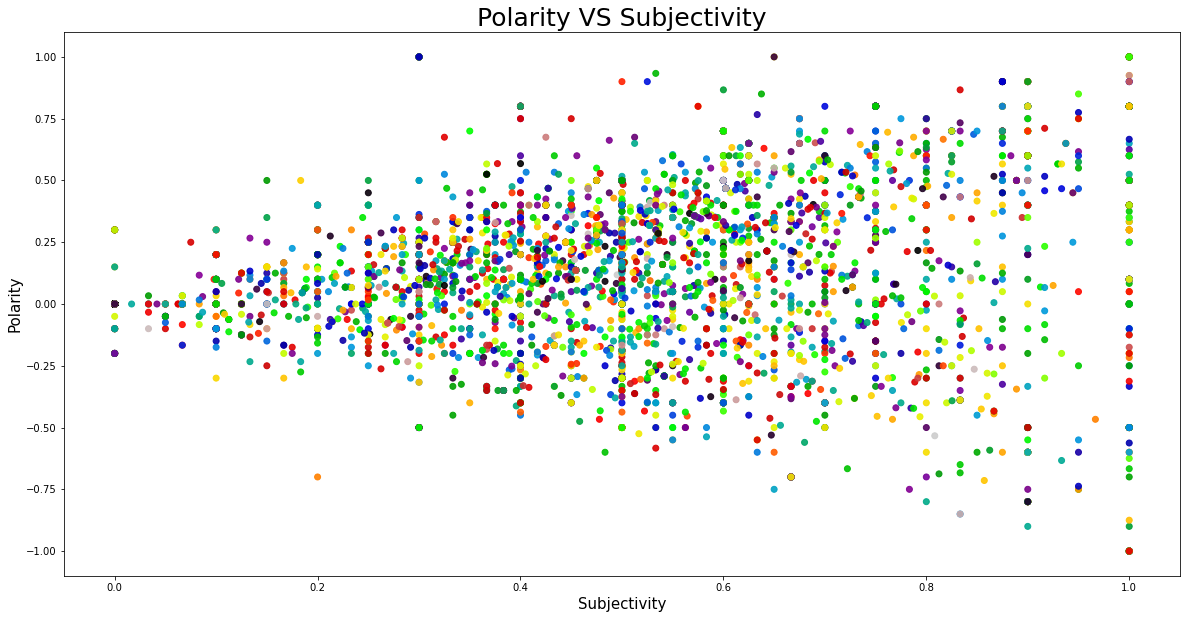

In [25]:
plt.figure(figsize=(20,10))
plt.xlabel("Subjectivity",fontsize=15)
plt.ylabel("Polarity", fontsize=15)
plt.title("Polarity VS Subjectivity",fontsize=25)
colors = np.random.randint(6444, size=(6444))
plt.scatter(myDf["subjectivity"], myDf["polarity"], c=colors, alpha=0.9, cmap='nipy_spectral')

In [26]:
myDf.to_csv("tweets_sentiments.csv", index=False)